<a href="https://colab.research.google.com/github/vincent0965/Colab_note/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [2]:
trans = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

ans: frog


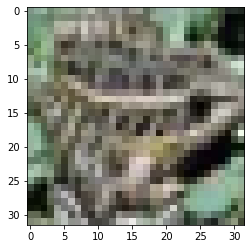

In [5]:
import random
import matplotlib.pyplot as plt

idx = random.randint(0, x_train.shape[0]-1)
print("ans:", trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
layers = [
    # 27(1 filter) * 64 + 64 -> 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 576(1 filter) * 128 + 128 -> 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [7]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [8]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [9]:
# epoch: 整份資料要看幾遍
# 60000筆, 2epoch, 200batch -> 60000 * 2 / 200次調整
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm, 
     y_train,
     batch_size=100,
     epochs=50,
     validation_split=0.1,
     callbacks=callbacks,
     verbose=2)

Epoch 1/50
450/450 - 4s - loss: 1.5648 - accuracy: 0.4286 - val_loss: 1.1830 - val_accuracy: 0.5880
Epoch 2/50
450/450 - 4s - loss: 1.1096 - accuracy: 0.6072 - val_loss: 0.9395 - val_accuracy: 0.6700
Epoch 3/50
450/450 - 4s - loss: 0.9093 - accuracy: 0.6823 - val_loss: 0.8295 - val_accuracy: 0.7148
Epoch 4/50
450/450 - 4s - loss: 0.7842 - accuracy: 0.7274 - val_loss: 0.7515 - val_accuracy: 0.7412
Epoch 5/50
450/450 - 4s - loss: 0.6855 - accuracy: 0.7608 - val_loss: 0.7412 - val_accuracy: 0.7464
Epoch 6/50
450/450 - 4s - loss: 0.5947 - accuracy: 0.7915 - val_loss: 0.7050 - val_accuracy: 0.7616
Epoch 7/50
450/450 - 4s - loss: 0.5259 - accuracy: 0.8148 - val_loss: 0.6942 - val_accuracy: 0.7682
Epoch 8/50
450/450 - 4s - loss: 0.4538 - accuracy: 0.8399 - val_loss: 0.7212 - val_accuracy: 0.7652
Epoch 9/50
450/450 - 4s - loss: 0.3889 - accuracy: 0.8615 - val_loss: 0.7347 - val_accuracy: 0.7736
Epoch 10/50
450/450 - 4s - loss: 0.3200 - accuracy: 0.8863 - val_loss: 0.7561 - val_accuracy: 0.7814

In [10]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7266 - accuracy: 0.7522


[0.7266026139259338, 0.7522000074386597]

In [11]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      index=["{}(原本)".format(n) for n in trans],
      columns=["{}(預測)".format(n) for n in trans])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(原本),835,15,24,9,10,8,12,4,51,32
automobile(原本),13,836,3,1,2,2,6,1,31,105
bird(原本),84,4,623,40,94,46,77,15,9,8
cat(原本),33,10,71,495,90,155,86,26,16,18
deer(原本),23,4,56,35,755,24,49,47,6,1
dog(原本),22,3,57,127,62,634,34,42,9,10
frog(原本),5,2,30,29,24,25,867,3,7,8
horse(原本),26,2,42,25,78,33,7,764,3,20
ship(原本),58,23,11,6,7,3,4,2,866,20
truck(原本),31,72,4,9,4,5,6,5,17,847


In [12]:
pre = model.predict_classes(x_test_norm)
print(pre.shape)
print(y_test.shape)
y_test_r = y_test.reshape(10000)
print(y_test_r.shape)
pre

(10000,)
(10000, 1)
(10000,)


array([3, 8, 8, ..., 5, 4, 7])

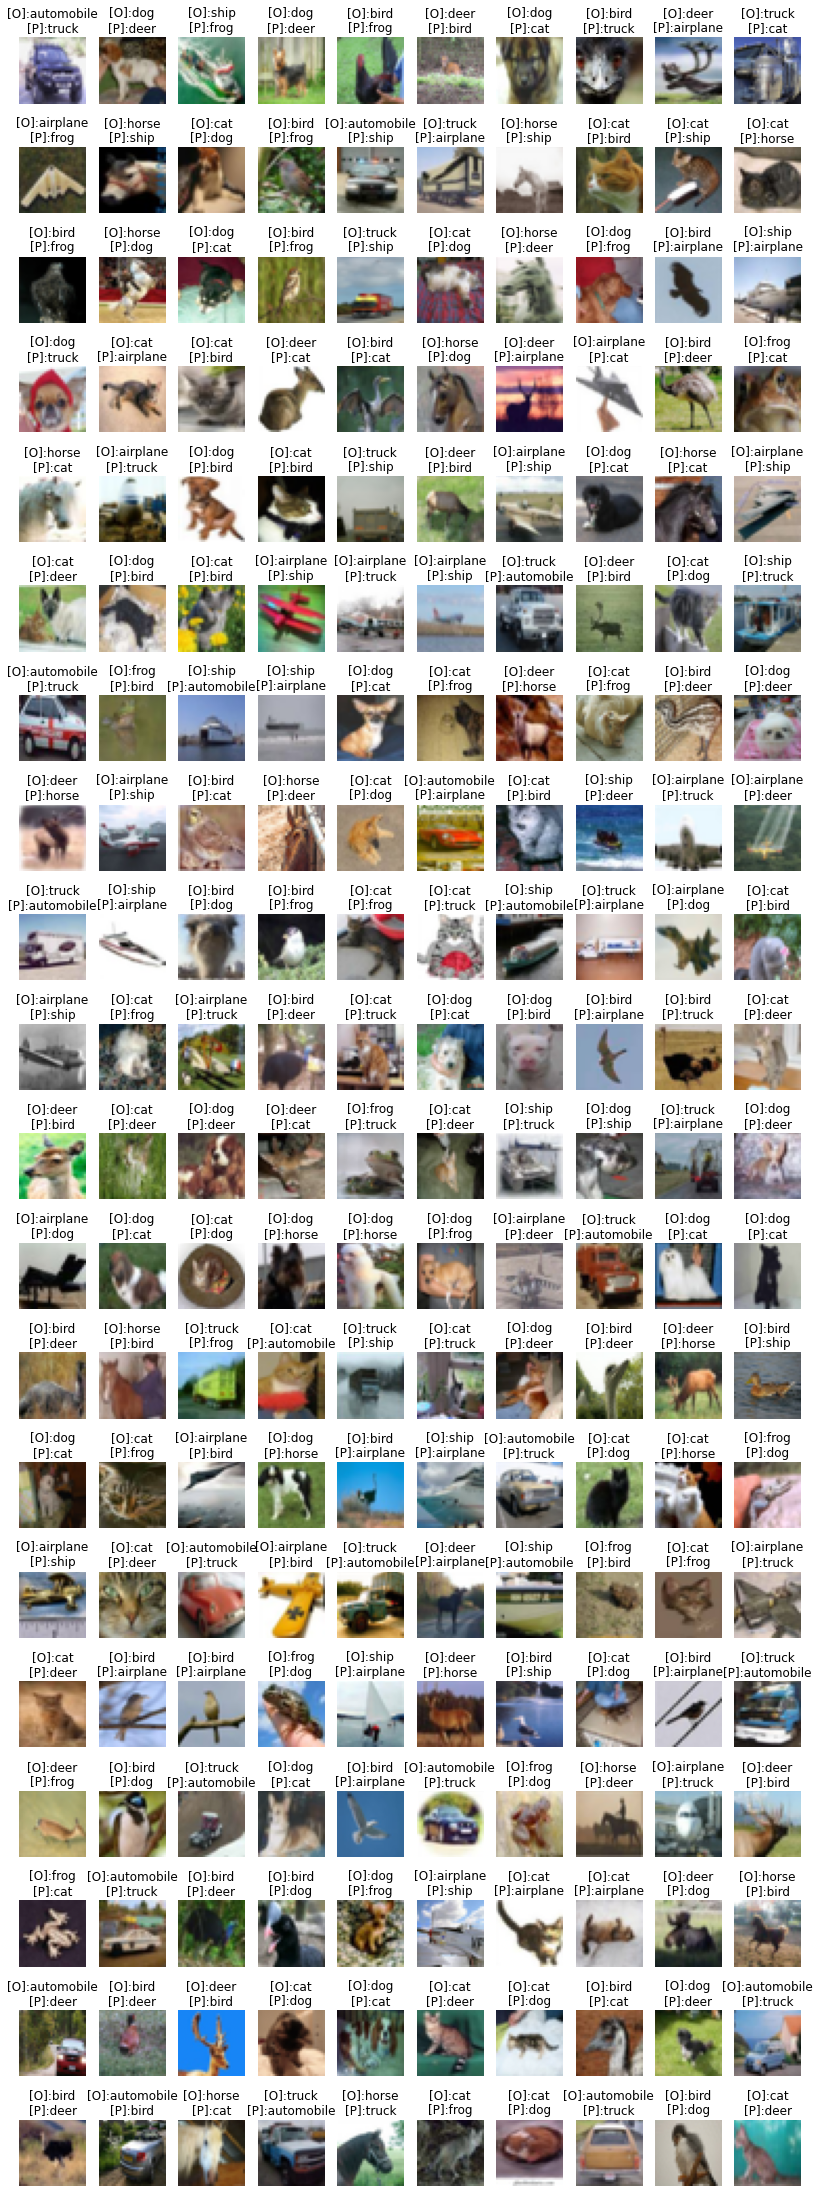

In [13]:
# subplot(總高度, 總寬度, ith)
import numpy as np
idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200]
false_img = x_test[idx]
false_label = y_test_r[idx]
false_pre = pre[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(false_img) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[O]:{}\n[P]:{}".format(trans[false_label[i]], trans[false_pre[i]])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])

In [ ]:
# pip install pillow
import PIL
import requests
url = input("輸入網址:")
h = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36"
}
response = requests.get(url, stream=True, verify=False, headers=h)
img = PIL.Image.open(response.raw).resize((32, 32))
img_np = np.array(img)
test = img_np.reshape(1, 32, 32, 3) / 255
probs = model.predict(test)[0]
for i, p in enumerate(probs):
    print(trans[i], "的機率是:", round(p, 3))
ans = model.predict_classes(test)[0]
print("應該是:", trans[ans])
plt.imshow(img_np)